## models Comparison

<h3>1- models progress</h3>
<h3>2- models score</h3>
<h3>3- models false positive error</h3>
<h3>4- model selection</h3>

In [90]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt

<h3>1- models progress</h3>

In [91]:
models_progress = {"logistic_regression" : [12.1 , 7.8] , "KNN" : [10.8 , 8] , "ANN" : [11.3 , 7.8]}
mp = pd.DataFrame(models_progress , index=['raw' , 'normalized'])

In [92]:
mp

,logistic_regression,KNN,ANN
raw,12.1,10.8,11.3
normalized,7.8,8.0,7.8


In [93]:
mp_reset = mp.reset_index().melt(
    id_vars="index",
    var_name="model",
    value_name="accuracy_progress"
)
mp_reset.rename(columns={"index": "data_type"} , inplace=True)

In [94]:
custom_palette = {
    "logistic_regression" : '#00D170',
    "KNN": '#d3d3d3' , 
    "ANN" : '#fff176',

}

<h3>Analysis of Model Progress</h3>
 
This chart illustrates the **accuracy improvement** of three models — *Logistic Regression*, *KNN*, and *ANN* — on **raw data** and **normalized data**.  
Accuracy improvement here refers to the **difference between the model’s performance before and after hyperparameter tuning with GridSearchCV**.
 
As shown in the chart, all three models achieved greater improvement when trained on raw data. This is because their initial performance on raw data was weaker, resulting in lower accuracy. After optimization, their accuracy increased significantly, leading to a larger gap between the baseline and tuned results.  
 
On the other hand, with normalized data, the models already performed better from the beginning, achieving relatively high accuracy. Therefore, after optimization, the improvement was smaller since the gap between the baseline and optimized accuracy was narrower.

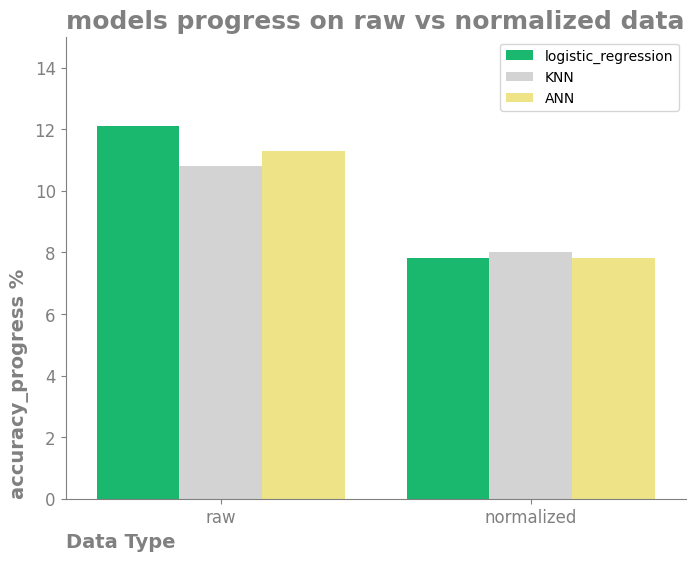

In [95]:
fig ,ax  = plt.subplots(figsize= (8,6))


sns.barplot(
    data=mp_reset,
    x = 'data_type',
    y = 'accuracy_progress',
    # color = np.where(
    #     mp_reset["logistic_regression"] , '#FF4340' , '#00D170')
    hue="model",
    palette= custom_palette,
    ax=ax
)

ax.set_title("models progress on raw vs normalized data",
    loc = "left",
    weight = 'bold',
    fontsize = 18,
    color='gray',)



ax.set_ylabel("accuracy_progress %",
    loc = "bottom",
    weight = 'bold',
    fontsize = 14,
    color='gray')


ax.set_xlabel("Data Type",
    loc = "left",
    weight = 'bold',
    fontsize = 14,
    color='gray',)


ax.legend()

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("gray")
ax.tick_params(axis='x' , color = "gray", labelsize = 'large')
ax.tick_params(axis='y' , color = "gray", labelsize = 'large')
ax.tick_params(axis = 'x' , colors = 'gray' , labelsize='large')
ax.tick_params(axis = 'y' , colors = 'gray' , labelsize = 'large')

ax.set_ylim([0,15])

plt.savefig('../reports/figures/model_progress.png' , dpi = 300)


plt.show()

<h3>2- Models score</h3>

In [96]:
models_score = {"logistic_regression" : [82.9 , 98.4 ,90] , "KNN" : [76.5 , 96.9, 85.5] , "ANN" : [82.9 , 98.4 ,90]}

mc = pd.DataFrame(models_score , index=['precision' , 'recall' , 'f1'])

In [97]:
mc

,logistic_regression,KNN,ANN
precision,82.9,76.5,82.9
recall,98.4,96.9,98.4
f1,90.0,85.5,90.0


In [98]:
mc_reset = mc.reset_index().melt(
    id_vars="index",
    var_name="model",
    value_name="score_value"
)
mc_reset.rename(columns={"index": "score_type"} , inplace=True)

In [99]:
mc_reset

,score_type,model,score_value
0,precision,logistic_regression,82.9
1,recall,logistic_regression,98.4
2,f1,logistic_regression,90.0
3,precision,KNN,76.5
4,recall,KNN,96.9
5,f1,KNN,85.5
6,precision,ANN,82.9
7,recall,ANN,98.4
8,f1,ANN,90.0



<h3>Analysis of Models Score</h3>

In this study, a dataset containing 600 records and 12 features was used. The evaluation of the models was conducted based on three key metrics: Precision, Recall, and F1-Score.

 The results indicated that Logistic Regression and ANN achieved almost identical performance across all three metrics, with Precision around 80%, Recall about 98%, and F1-Score approximately 90%. In contrast, the KNN model performed slightly worse, showing lower values across all metrics.
 
  A possible explanation for these outcomes is that, with a relatively small dataset and relatively simple features, models based on linear relationships such as **Logistic Regression** or more flexible models like ANN can identify patterns more effectively. On the other hand, the KNN model is highly sensitive to the data distribution and the choice of the number of neighbors, which likely contributed to its relatively weaker performance.

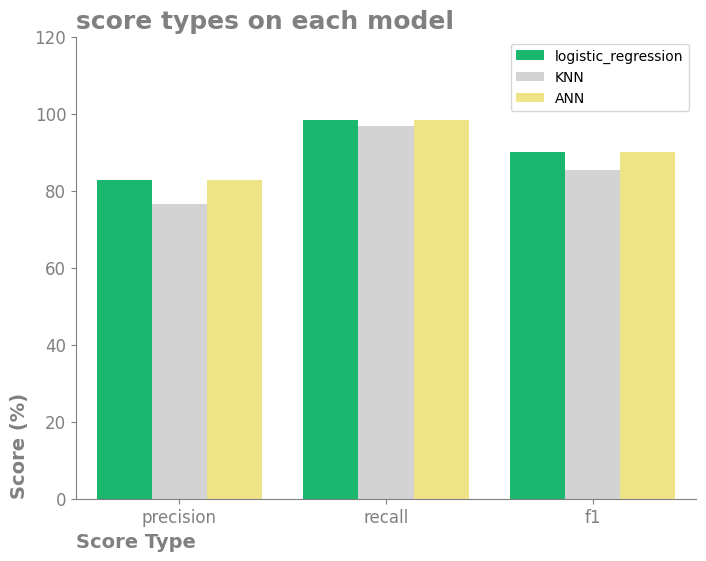

In [106]:
fig , ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=mc_reset,
            x="score_type",
            y="score_value",
            hue="model",
            palette= custom_palette)
 
ax.set_title("score types on each model",
    loc = "left",
    weight = 'bold',
    fontsize = 18,
    color='gray',)


ax.set_ylabel("Score (%)",
    loc = "bottom",
    weight = 'bold',
    fontsize = 14,
    color='gray')

ax.set_xlabel("Score Type",
    loc = "left",
    weight = 'bold',
    fontsize = 14,
    color='gray',)


plt.legend()
ax.spines[["right", "top"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("gray")
ax.tick_params(axis='x' , color = "gray", labelsize = 'large')
ax.tick_params(axis='y' , color = "gray", labelsize = 'large')
ax.tick_params(axis = 'x' , colors = 'gray' , labelsize='large')
ax.tick_params(axis = 'y' , colors = 'gray' , labelsize = 'large')

ax.set_ylim([0,120])

plt.savefig("../reports/figures/score_types_on_each_model", dpi=300)


plt.show()

<h3>3- models False Positive Error</h3>

In [101]:
models_FP = {"logistic_regression" : [13.98 , 13.98] , "KNN" : [29.3 , 20.43] , "ANN" : [30.11 , 13.98]}
MFP = pd.DataFrame(models_FP , index=['raw' , 'normalized'])

In [102]:
MFP

,logistic_regression,KNN,ANN
raw,13.98,29.30,30.11
normalized,13.98,20.43,13.98


In [103]:
MFP_reset = MFP.reset_index().melt(
    id_vars="index",
    var_name="model",
    value_name="False Positive"
)
MFP_reset.rename(columns={"index": "data_type"} , inplace=True) 

In [104]:
MFP_reset

,data_type,model,False Positive
0,raw,logistic_regression,13.98
1,normalized,logistic_regression,13.98
2,raw,KNN,29.30
3,normalized,KNN,20.43
4,raw,ANN,30.11
5,normalized,ANN,13.98


<h3>Analysis of Models False Positive Error</h3>


The chart illustrates the False Positive (FP) error rate for three models—Logistic Regression, K-Nearest Neighbors (KNN), and Artificial Neural Networks (ANN)—under two conditions: raw and preprocessed data. The significance of FP errors stems from the critical role these models play in predicting loan eligibility; misclassifying ineligible individuals (those unable to repay installments) as eligible can result in substantial financial losses for the business.

 This error represents the percentage of individuals incorrectly approved for a loan, which is considered more consequential than False Negative (FN) errors. In the case of FN, a qualified individual who is initially rejected may still obtain a loan upon reapplication and further review by bank staff.
 
The primary objective of this chart is to evaluate and compare the models' performance based on FP rates. In the raw data scenario, KNN and ANN exhibited high FP rates, whereas Logistic Regression performed better with a lower error rate.

 After data preprocessing, the FP rates for KNN—and particularly ANN—decreased significantly, highlighting the dependence of these models on the quality and structure of input data. Ultimately, both Logistic Regression and ANN achieved a 14% FP rate, indicating convergence in their performance following data optimization.

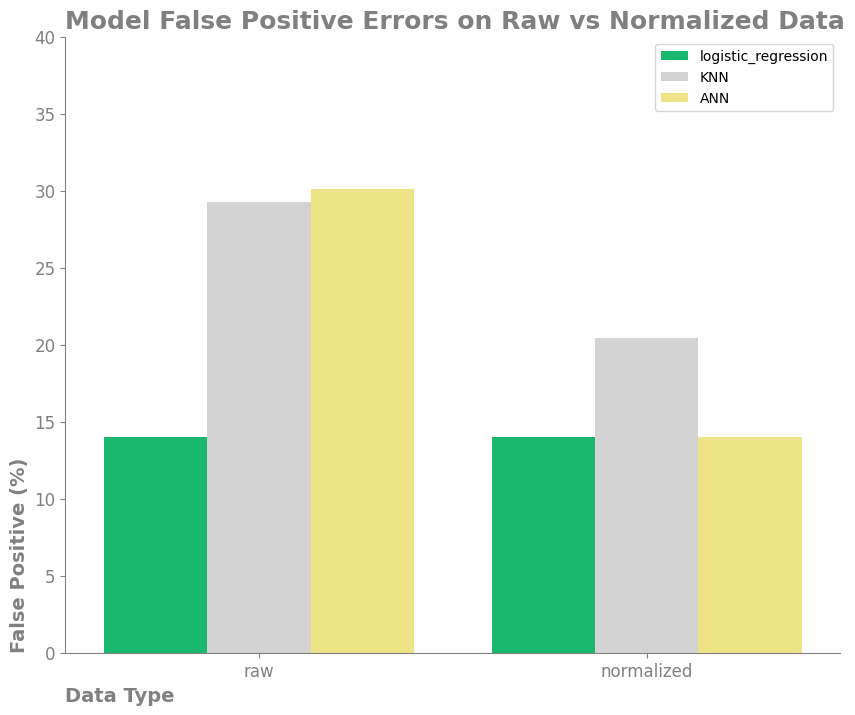

In [108]:
fig , ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=MFP_reset,
            x="data_type",
            y="False Positive",
            hue="model",
            palette=custom_palette)


ax.set_title("Model False Positive Errors on Raw vs Normalized Data",
    loc = "left",
    weight = 'bold',
    fontsize = 18,
    color='gray',)



ax.set_ylabel("False Positive (%)",
    loc = "bottom",
    weight = 'bold',
    fontsize = 14,
    color='gray')


ax.set_xlabel("Data Type",
    loc = "left",
    weight = 'bold',
    fontsize = 14,
    color='gray',)


plt.legend()
ax.spines[["right", "top"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("gray")
ax.tick_params(axis='x' , color = "gray", labelsize = 'large')
ax.tick_params(axis='y' , color = "gray", labelsize = 'large')
ax.tick_params(axis = 'x' , colors = 'gray' , labelsize='large')
ax.tick_params(axis = 'y' , colors = 'gray' , labelsize = 'large')

ax.set_ylim([0,40])



plt.savefig("../reports/figures/False_Positive_Errors.png", dpi=300)
plt.show()


<h3>4- Model Selection</h3>

Considering the critical importance of False Positive (FP) errors in predicting loan eligibility, the primary criterion for model selection is minimizing this type of error. As illustrated in the chart, the Logistic Regression model demonstrates satisfactory performance not only on preprocessed data but also on raw data, indicating its ability to operate independently of the input data type—a stability that represents a significant advantage.
 
In contrast, the K-Nearest Neighbors (KNN) and Artificial Neural Network (ANN) models only achieve acceptable results when applied to preprocessed data. Among them, ANN exhibits better FP reduction compared to KNN. After data preprocessing, both Logistic Regression and ANN reached an FP rate of 14%. Considering that Logistic Regression is a simpler, faster, and less resource-intensive model, selecting it as the final model is both logical and efficient.
 
However, ANN—with its greater number of parameters and ability to learn more complex patterns—has the potential to perform better on larger or more complex datasets, particularly in identifying borderline cases. For the dataset and conditions analyzed in this study, **Logistic Regression** represents the most suitable choice.